<h1 style="text-align:center;font-weight: bold;">GLASS CLASSIFICATION</h1>



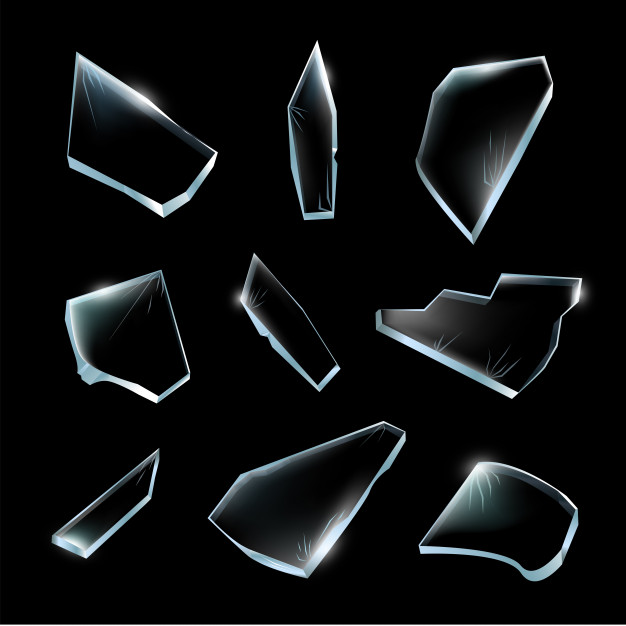

<font color = '#E22812'>
Content:
    
1. [Load and Check Data](#1)
1. [Create Models](#2)   
    *           [Logistic Regression](#3)
    *           [KNN - K Nearest Neighbors](#4)
    *           [SVC - Support Vector Classifier](#5)
    *           [Naive Bayes](#6)
    *           [Decision Tree](#7)
    *           [Random Forest](#8)
1. [Evaluate Models](#9)
    *           [Cross Val Score](#10)
    *           [Comparision of Confusion Matrices](#11)
    *           [Comparision of F1 Scores](#12)
1. [Conclusion](#13) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.api as sm 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<a id = "1"></a><br>
# Load and Check Data

In [2]:
df = pd.read_csv('/kaggle/input/glass/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**There is no categorical data, so I will not use an encoder.**

In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**No null data, that's nice.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**They all consist of 214 rows, the x columns are float type, the y column is integer type. Data is clean so far.**

In [5]:
df['Type'].value_counts().sort_values(ascending = False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**There is no 'Type' variant with the number '4'.**

<AxesSubplot:xlabel='Type', ylabel='count'>

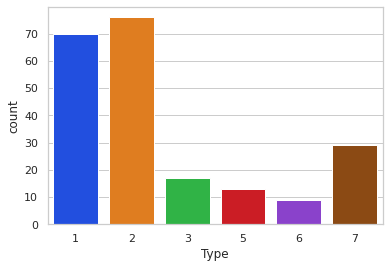

In [6]:
#Let's see the number of data types in the 'Type' column with a bar graph.

sns.set(style = 'whitegrid')
sns.countplot(x="Type", data=df, palette='bright')

**Imbalanced data! Therefore, I will use 'F1 Score' to evaluate models.**

In [7]:
# Types Means (What do 1,2,3,5,6,7 Types mean?)

glassTypesList = ['1 -> building_windows_float_processed',
                  '2 -> building_windows_non_float_processed',
                  '3 -> vehicle_windows_float_processed',
                  '4 -> vehicle_windows_non_floatprocessed (none in this database)',
                  '5 -> containers',
                  '6 -> tableware', 
                  '7 -> headlamps']

print('\033[32m'+'\033[4m'+'Target Column Description(Type of glass - class attribute)\n'+'\033[0m')

for i in range(0,len(df['Type'].unique())+1):
    print('\033[31m'+glassTypesList[i])

Target Column Description(Type of glass - class attribute)

1 -> building_windows_float_processed
2 -> building_windows_non_float_processed
3 -> vehicle_windows_float_processed
4 -> vehicle_windows_non_floatprocessed (none in this database)
5 -> containers
6 -> tableware
7 -> headlamps


**So, the reason why there is no glass with 4 Types is that it does not exist in the dataset. Also, by looking at this, we can see which type means what.**

In [8]:
# Features Means (What do 'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe' mean?)

print('\033[01m'+'\033[32m'+'\033[4m'+'Feature Columns Description\n'+'\033[0m')

featuresList = ['RI -> refractive index',
                'Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)',
                'Mg -> Magnesium',
                'Al -> Aluminum',
                'Si -> Silicon',
                'Ca  -> Potassium', 
                'Ba -> Barium',
                'Fe -> Iron']

for i in range(0,len(df.columns.unique())-2):
    print('\033[31m'+featuresList[i])

Feature Columns Description

RI -> refractive index
Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg -> Magnesium
Al -> Aluminum
Si -> Silicon
Ca  -> Potassium
Ba -> Barium
Fe -> Iron


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**When I compare the Mean and Std values of each column; The Std values of the "Type, Fe, Ba, K" columns are too large compared to the Mean values. This can adversely affect the performance of our models. After we set up our models,  maybe we can eliminate some columns (except the Type column, because that target column) through some methods such as 'Backward Elimination'. I will evaluate this after looking at the performance of our models.If there is no improvement in the performance of the models, we cancel the backward elimination or try something else.**

In [10]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


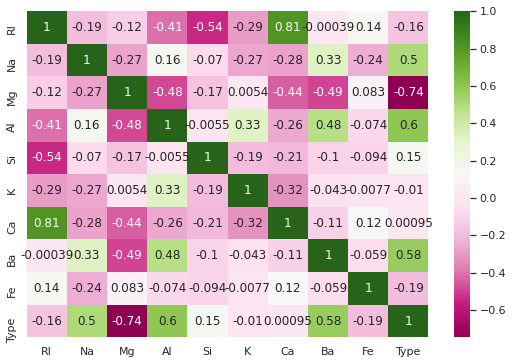

In [11]:
# Let's see the correlation values on a heatmap

cor = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data = cor, annot = True, cmap = 'PiYG')
plt.show()

**The maximum correlation is between 'Type' and 'Ca' and its value is 0.81, so we can generally say that as one increases, the other increases and vice versa. The minimum correlation or maximum negative correlation is between 'A1' and 'Type' and its value is -0.71, so as one decreases, the other increases.**

<a id = "2"></a><br>
# Create Models

In [12]:
# x and y assignment

x = df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y = df.iloc[:,9:]

In [13]:
#Let's see how x and y look

x.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [14]:
y.head(3)

,Type
0,1
1,1
2,1


**They are as they should be, good.**

In [15]:
# Splitting the Data Set into Independent Variables and Dependent Variables

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=18)

<a id = "3"></a><br>
# Logistic Regression

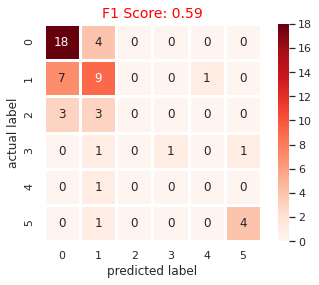

In [16]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=8)
logr.fit(x_train,y_train)

y_pred = logr.predict(x_test)

# confusion matrix and f1 score
f1_score_logr = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='red')
plt.show()

<a id = "4"></a><br>
# KNN - K Nearest Neighbors

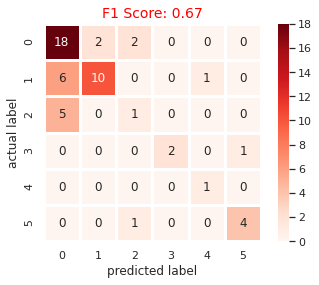

Minimum error: 0.30 at K: 1


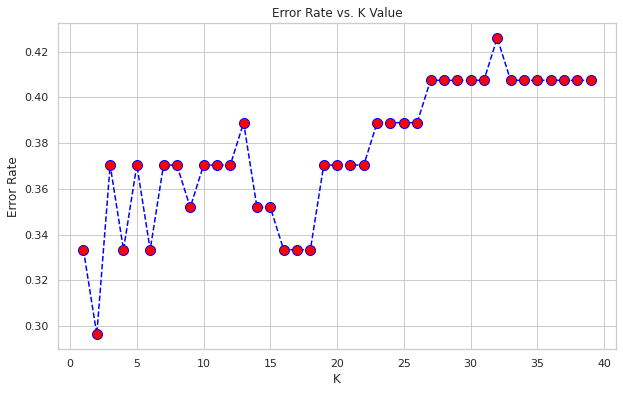

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

# confusion matrix and f1 score
f1_score_knn = f1_score(y_test,y_pred, average='micro')
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_knn:.2f}',size=14,color='red')
plt.show()

# finding optimum k
error_rate = []
for i in range(1,40):
    knn_test = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    knn_test.fit(x_train,y_train)
    pred_i = knn_test.predict(x_test)
    pred_i=pred_i.reshape(54,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

error_rate = np.array(error_rate)
a = error_rate.tolist().index(error_rate.min())
print(f'Minimum error: {error_rate.min():.2f} at K: {a}')

**We chose K as 1 because the lowest error rate was when K=1**

<a id = "5"></a><br>
# SVC - Support Vector Classifier

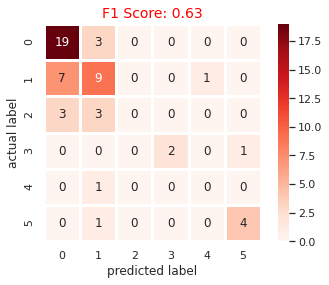

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability=True)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

# confusion matrix and f1 score
f1_score_svc = f1_score(y_test,y_pred, average='micro')
cm_svc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_svc:.2f}',size=14,color='red')
plt.show()

<a id = "6"></a><br>
# Naive Bayes

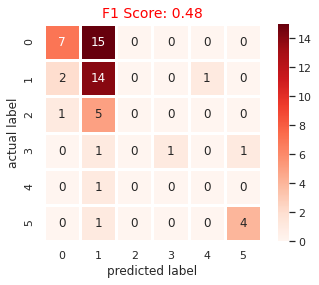

In [19]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

# confusion matrix and f1 score
f1_score_mnb = f1_score(y_test,y_pred, average='micro')
cm_mnb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_mnb, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_mnb:.2f}',size=14,color='red')
plt.show()

Why is Multinomial Naive Bayes more suitable for this data set?

If the column to be predicted is binomial, ie binary, ie 1 or 0, 'Bernoulli Naive Bayes' is used. I did not use 'Bernoulli' as the y column in this dataset is not binomial. (Similar to not using sigmoid in the SVC just before)

If the column to be predicted consists of contunious numbers, that is, if it consists of real numbers, 'Gaussian Naive Bayes' is used. However, in this dataset, column y consists of strings, not real numbers. That's why I didn't use 'Gaussian Naive Bayes'.

If the column to be predicted consists of nominal data, 'Multinomial Naive Bayes' is used. In suitable with this kind of Naive Bayes, column y in this data set consists of nominal data.
> Because "...where the data are typically **represented as word** vector counts, although tf-idf vectors are also known to work well in practice." quotation: scikit-learn.org/stable/modules/naive_bayes

The data 0,1,2,3,4,5,6,7 in the 'Type' column actually represents a word, and since there is no ranking between these words
so these are multinomial data.

That's why I used 'Multinomial Naive Bayes'.

<a id = "7"></a><br>
# Decision Tree 

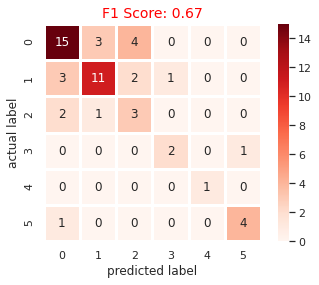

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)


# confusion matrix and f1 score
f1_score_dtc = f1_score(y_test,y_pred, average='micro')
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_dtc:.2f}',size=14,color='red')
plt.show()

<a id = "8"></a><br>
# Random Forest 

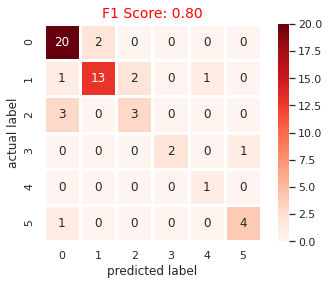

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 250, criterion = 'entropy')
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)


# confusion matrix and f1 score
f1_score_rfc = f1_score(y_test,y_pred, average='micro')
cm_rfc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_rfc:.2f}',size=14,color='red')
plt.show()

<a id = "9"></a><br>
# Evaluate Models

<a id = "10"></a><br>
# Cross Val Score

In [22]:
# cross_val_score
from sklearn.model_selection import cross_val_score

print(cross_val_score(rfc, x, y, cv=5))

[0.76744186 0.69767442 0.60465116 0.65116279 0.76190476]


In [23]:
# mean of accuracies
accuracies = cross_val_score(rfc, x_train, y_train, cv = 5)
print(f'Accuracy (mean):{accuracies.mean()*100}')
print('std: %',accuracies.std()*100)

Accuracy (mean):78.75
std: % 6.059599821770411


In [24]:
# inference from cross_val_score
print(f'Random Forest F1 Score: {f1_score_rfc*100:.2f}')
print(f'Accuracy (mean):{accuracies.mean()*100:}')
print(f'std: % {accuracies.std()*100:.2f}')

Random Forest F1 Score: 79.63
Accuracy (mean):78.75
std: % 6.06


**There is no overfitting as they are very close to each other, good.**

<a id = "11"></a><br>
# Comparision of Confusion Matrices

In [25]:
# Confusion Matrices
print('\033[1m' + '\033[96m' + '-CONFUSİON MATRİCES-\n' + '\033[0m'+'\033[0m')

print('\033[1m' + f'Logistic Regression' +'\033[0m' + f'\n{cm_logr}' + f' F1 Score: {f1_score_logr:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'KNN-K Nearest Neighbors' +'\033[0m' + f'\n{cm_knn}' + f' F1 Score: {f1_score_knn:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'SVC-Support Vector Classifier' +'\033[0m' + f'\n{cm_svc}' + f' F1 Score: {f1_score_svc:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Multinomial Naive Bayes' +'\033[0m' + f'\n{cm_mnb}' + f' F1 Score: {f1_score_mnb:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Decision Tree Classifier' +'\033[0m' + f'\n{cm_dtc}' + f' F1 Score: {f1_score_dtc:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Random Forest Classifier' +'\033[0m' + f'\n{cm_rfc}' + f' F1 Score: {f1_score_rfc:.2f}\n\n' + '\033[0m'  )

-CONFUSİON MATRİCES-

Logistic Regression
[[18  4  0  0  0  0]
 [ 7  9  0  0  1  0]
 [ 3  3  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  4]] F1 Score: 0.59


KNN-K Nearest Neighbors
[[18  2  2  0  0  0]
 [ 6 10  0  0  1  0]
 [ 5  0  1  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  1  0  0  4]] F1 Score: 0.67


SVC-Support Vector Classifier
[[19  3  0  0  0  0]
 [ 7  9  0  0  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  4]] F1 Score: 0.63


Multinomial Naive Bayes
[[ 7 15  0  0  0  0]
 [ 2 14  0  0  1  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  4]] F1 Score: 0.48


Decision Tree Classifier
[[15  3  4  0  0  0]
 [ 3 11  2  1  0  0]
 [ 2  1  3  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  4]] F1 Score: 0.67


Random Forest Classifier
[[20  2  0  0  0  0]
 [ 1 13  2  0  1  0]
 [ 3  0  3  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 1 

**Random Forest has the best performance.**

<a id = "12"></a><br>
# Comparision of F1 Scores

In [26]:
# Let's see F1 Scores in a table
NamesOfAlgorithms_df = pd.DataFrame(['Logistic Regression','KNN - K Nearest Neighbors','SVC - Support Vector Classifier','Multinomial Naive Bayes','Decision Tree Classifier','Random Forest Classifier'])
AcScoresOfAlgorithms_df = pd.DataFrame([f1_score_logr,f1_score_knn,f1_score_svc,f1_score_mnb,f1_score_dtc,f1_score_rfc])

df3 = pd.concat([NamesOfAlgorithms_df,AcScoresOfAlgorithms_df],axis=1)
df3.columns=['ALGORİTHM','F1 SCORE',]

df3

,ALGORİTHM,F1 SCORE
0,Logistic Regression,0.592593
1,KNN - K Nearest Neighbors,0.666667
2,SVC - Support Vector Classifier,0.629630
3,Multinomial Naive Bayes,0.481481
4,Decision Tree Classifier,0.666667
5,Random Forest Classifier,0.796296


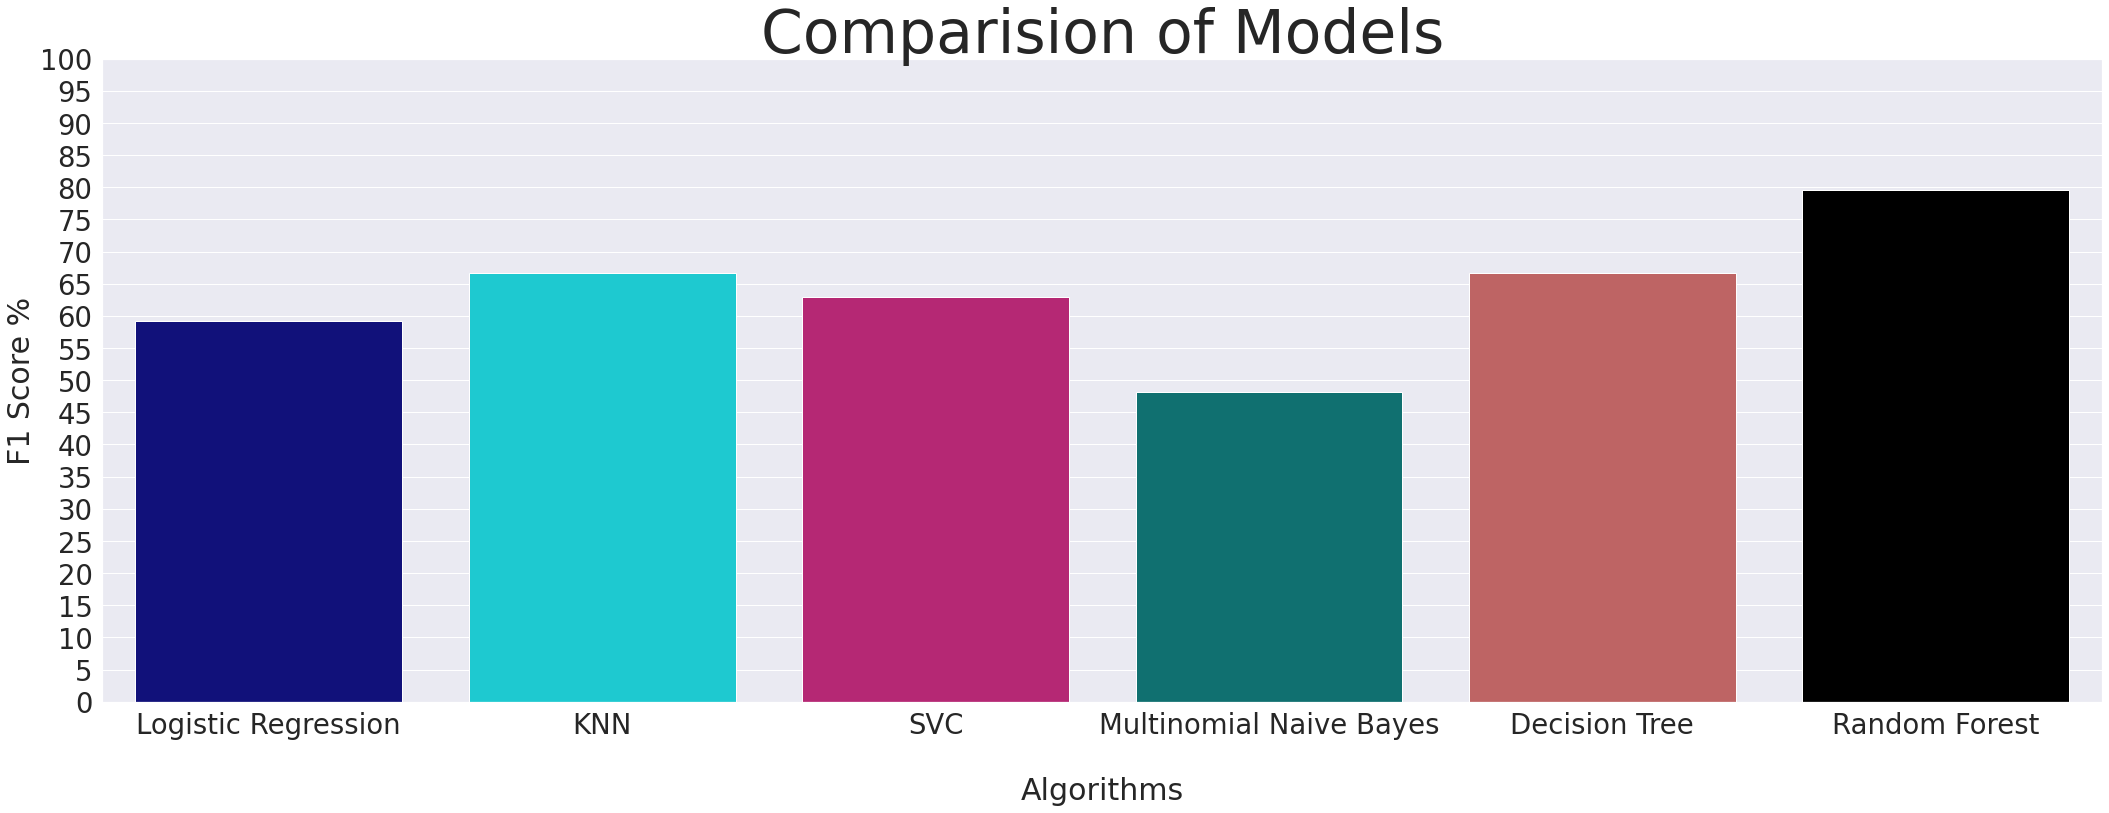

In [27]:
# F1 Scores Comparison on a Bar Chart
dict_Scores = {'Logistic Regression': f1_score_logr*100 , 'KNN': f1_score_knn*100,
               'SVC': f1_score_svc*100, 'Multinomial Naive Bayes': f1_score_mnb*100, 
               'Decision Tree': f1_score_dtc*100, 'Random Forest': f1_score_rfc*100
              }

colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']
sns.set_style("whitegrid")
sns.set(font_scale = 2.5)
plt.figure(figsize=(30,12))
sns.barplot(x=list(dict_Scores.keys()), y=list(dict_Scores.values()), palette=colors)
plt.yticks(np.arange(0,101,5))
plt.title('Comparision of Models', fontsize=60)
plt.ylabel("F1 Score %", fontsize=30)
plt.xlabel("\nAlgorithms", fontsize=30)
plt.tight_layout()
plt.show()

<a id = "13"></a><br>
# Conlusion

* The model with the best performance was Ranfom Forest. 

* In my opinion, The success of Random Forest In in this dataset depends on whether the data category is labeled data, the data is not too much, and the data is numeric data rather than text data. Also, random forest has a parameter such as n_estimators, which generally increases precision, of course, while this parameter increases precision from time to time, it usually increases the cost at the same rate. According to Decision Tree, Random Forest was more successful because Random Forest works on accuracy rather than speed due to its algorithm structure. Also, the reason naive bayes has the lowest score is because data is not text data, because naive bayes text works better with text data.
 
* Fe, Ba, K columns have high standard deviations compared to their mean. This negatively affected the performance of the models.

* I didn't add it to the code, but I tried some things in the background, I removed some variables from the data set with backward elimination, but as a result, there was no significant increase in model performances, so I did not want to disturb the general structure of the data and included all the variables in my models.
 
* While there were small increases in the performance of some models, there were decreases in others. Since this was not a result of backward elimination we wanted, I gave up and included all the variables in the models, so the general structure of the data was not deteriorated.

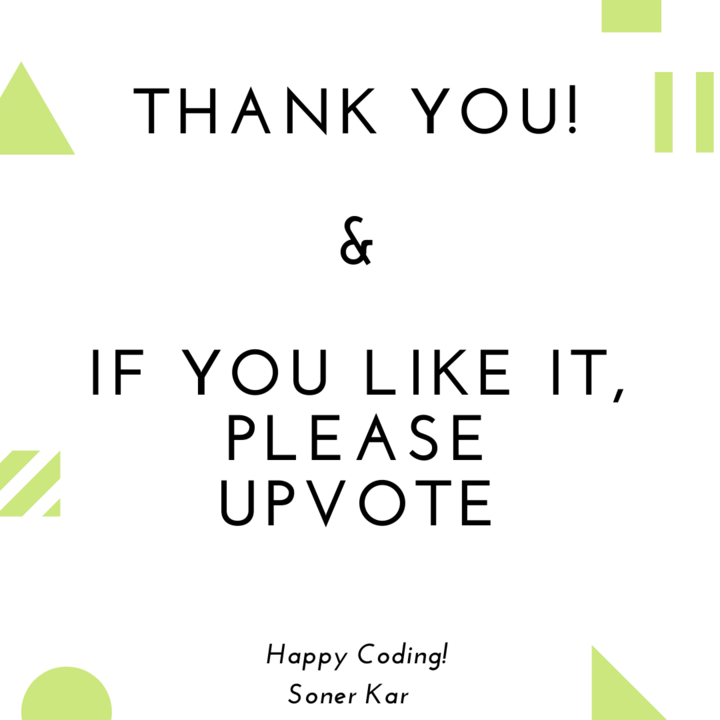